<a href="https://colab.research.google.com/github/Jules-gatete/Mission_Capstone/blob/main/UmutiSafe_ML_Model_Development_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UmutiSafe: Intelligent Medicine Disposal Guidance System


#Author: Jules Gatete
#Institution: African Leadership University
#Date: 29th October 2025

# **SECTION 1: PROJECT OVERVIEW & METHODOLOGY**


# UmutiSafe: Transfer Learning Approach to Medicine Disposal

## Problem Statement
90%+ of Rwandan households dispose of medicines improperly, causing:
- Environmental contamination
- Antimicrobial resistance
- Accidental poisoning
- Public health risks



# GOOGLE COLAB SETUP



# Pharmaceutical Waste Disposal Classification Model
## Machine Learning Model for Automated Medicine Disposal Guidelines

This notebook creates a model that:
1. Classifies medicines into disposal categories
2. Assesses risk levels
3. Generates appropriate disposal guidelines
4. Can be deployed for real-time classification


#Cell 1: Install & Import Required Libraries


In [15]:
# Install required libraries
!pip install scikit-learn pandas numpy gensim

print("✓ All libraries installed successfully!")

✓ All libraries installed successfully!


In [29]:
# Install required libraries
!pip install scikit-learn pandas numpy imbalanced-learn matplotlib seaborn -q

import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE

print("✓ All libraries installed and imported successfully!")

✓ All libraries installed and imported successfully!


# Load and prepare data


In [30]:
## Step 2: Load and Prepare Data
# Load the medicines data from CSV
# Replace 'medicines.csv' with your actual file path
df = pd.read_csv('/content/drive/MyDrive/UmutiSafe/data/raw/rwanda_fda_medicines_fixed.csv')

# Display first few rows
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
df.head()


Dataset shape: (2322, 16)

First 5 rows:


,No,Registration_No,Brand_Name,Generic_Name,Dosage_Strength,Dosage_Form,Pack_Size,Packaging_Type,Shelf_Life,Manufacturer_Name,Manufacturer_Address,Manufacturer_Country,Marketing_Authorization_Holder,Local_Technical_Representative,Registration_Date,Expiry_Date
0,1,Rwanda FDA-HMP-MA-0033,ILET B2,"Glimepiride, Metformin HCl","2mg, 500mg",Tablets,"Box Of 10, Box Of 30",ALU-PVC/PVDC BLISTER PACK,24 Months,MSN LABORATORIES PRIVATE LIMITED (Formulations...,"Plot No. 42, Anrich Industrial Estate, Bollara...",INDIA,MSN LABORATORIES PRIVATE LIMITED,ABACUS PHARMA (A) LTD,2020-09-07,2025-09-07
1,2,Rwanda FDA-HMP-MA-0021,BI-PRETERAX,"Peridopril Arginine, Indapamide","5mg, 1.25mg",Tablets,30 Film Coated Tablets,POLYPROPYLENE CONTAINER,36 Months,LES LABORATOIRES SERVIER,"905 ROUTE DE SARAN, 45520 GIDY, FRANCE",FRANCE,LES LABORATOIRES SERVIER,KIPHARMA LTD,2020-09-15,2025-09-15
2,3,Rwanda FDA-HMP-MA-0022,DIAMICRON MR,Gliclazide,60mg,Tablets,30 Film Coated Tablets,ALU-ALU BLISTER PACK,24 Months,LES LABORATOIRES SERVIER,"905 ROUTE DE SARAN, 45520 GIDY, FRANCE",FRANCE,LES LABORATOIRES SERVIER,KIPHARMA LTD,2020-09-15,2025-09-15
3,4,Rwanda FDA-HMP-MA-0023,EYLEA,Aflibercept,40mg/ml,Solution For Injection,1 Vial*2ml,TYPE 1 GLASS VIAL,24 Months,"RAGENERON PHARMACEUTICALS, VETTER PHARMA-FERTI...","Inc.81 Columbia Turnpike, Rensselaer, New York...","USA, GERMANY",BAYER EAST AFRICA LIMITED,SURGIPHARM (RWANDA) LTD,2020-09-15,2025-09-15
4,5,Rwanda FDA-HMP-MA-0024,FLOXSAFE-400,Moxifloxacin,400mg,Tablets,3 Blisters Of 5 Tablets,PVC /PVDC BLISTER PACK,24 Months,MSN LABORATORIES PRIVATE LIMITED (Formulations...,"Plot No. 42, Anrich Industrial Estate, Bollara...",INDIA,MSN LABORATORIES PRIVATE LIMITED,ABACUS PHARMA (A) LTD,2020-09-15,2025-09-15


In [31]:
# Check column names and data types
print("Column names:")
print(df.columns.tolist())
print("\nData types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())


Column names:
['No', 'Registration_No', 'Brand_Name', 'Generic_Name', 'Dosage_Strength', 'Dosage_Form', 'Pack_Size', 'Packaging_Type', 'Shelf_Life', 'Manufacturer_Name', 'Manufacturer_Address', 'Manufacturer_Country', 'Marketing_Authorization_Holder', 'Local_Technical_Representative', 'Registration_Date', 'Expiry_Date']

Data types:
No                                object
Registration_No                   object
Brand_Name                        object
Generic_Name                      object
Dosage_Strength                   object
Dosage_Form                       object
Pack_Size                         object
Packaging_Type                    object
Shelf_Life                        object
Manufacturer_Name                 object
Manufacturer_Address              object
Manufacturer_Country              object
Marketing_Authorization_Holder    object
Local_Technical_Representative    object
Registration_Date                 object
Expiry_Date                       object
dtype: ob

In [34]:

print("DATA CLEANING")


# Document original missing values
print("\n1. Original Missing Values:")
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary > 0])

# Fill missing values
df['Generic_Name'] = df['Generic_Name'].fillna('Unknown Ingredient')
df['Packaging_Type'] = df['Packaging_Type'].fillna('Standard Packaging')
df['Pack_Size'] = df['Pack_Size'].fillna('Standard Pack')
df['Shelf_Life'] = df['Shelf_Life'].fillna('24 Months')

print(f"\n2. Filled missing values")
print(f"   Remaining missing values: {df.isnull().sum().sum()}")

print("\n✓ Data cleaning complete!")

DATA CLEANING

1. Original Missing Values:
Manufacturer_Address              5
Manufacturer_Country              1
Local_Technical_Representative    1
dtype: int64

2. Filled missing values
   Remaining missing values: 7

✓ Data cleaning complete!


EXPLORATORY DATA ANALYSIS


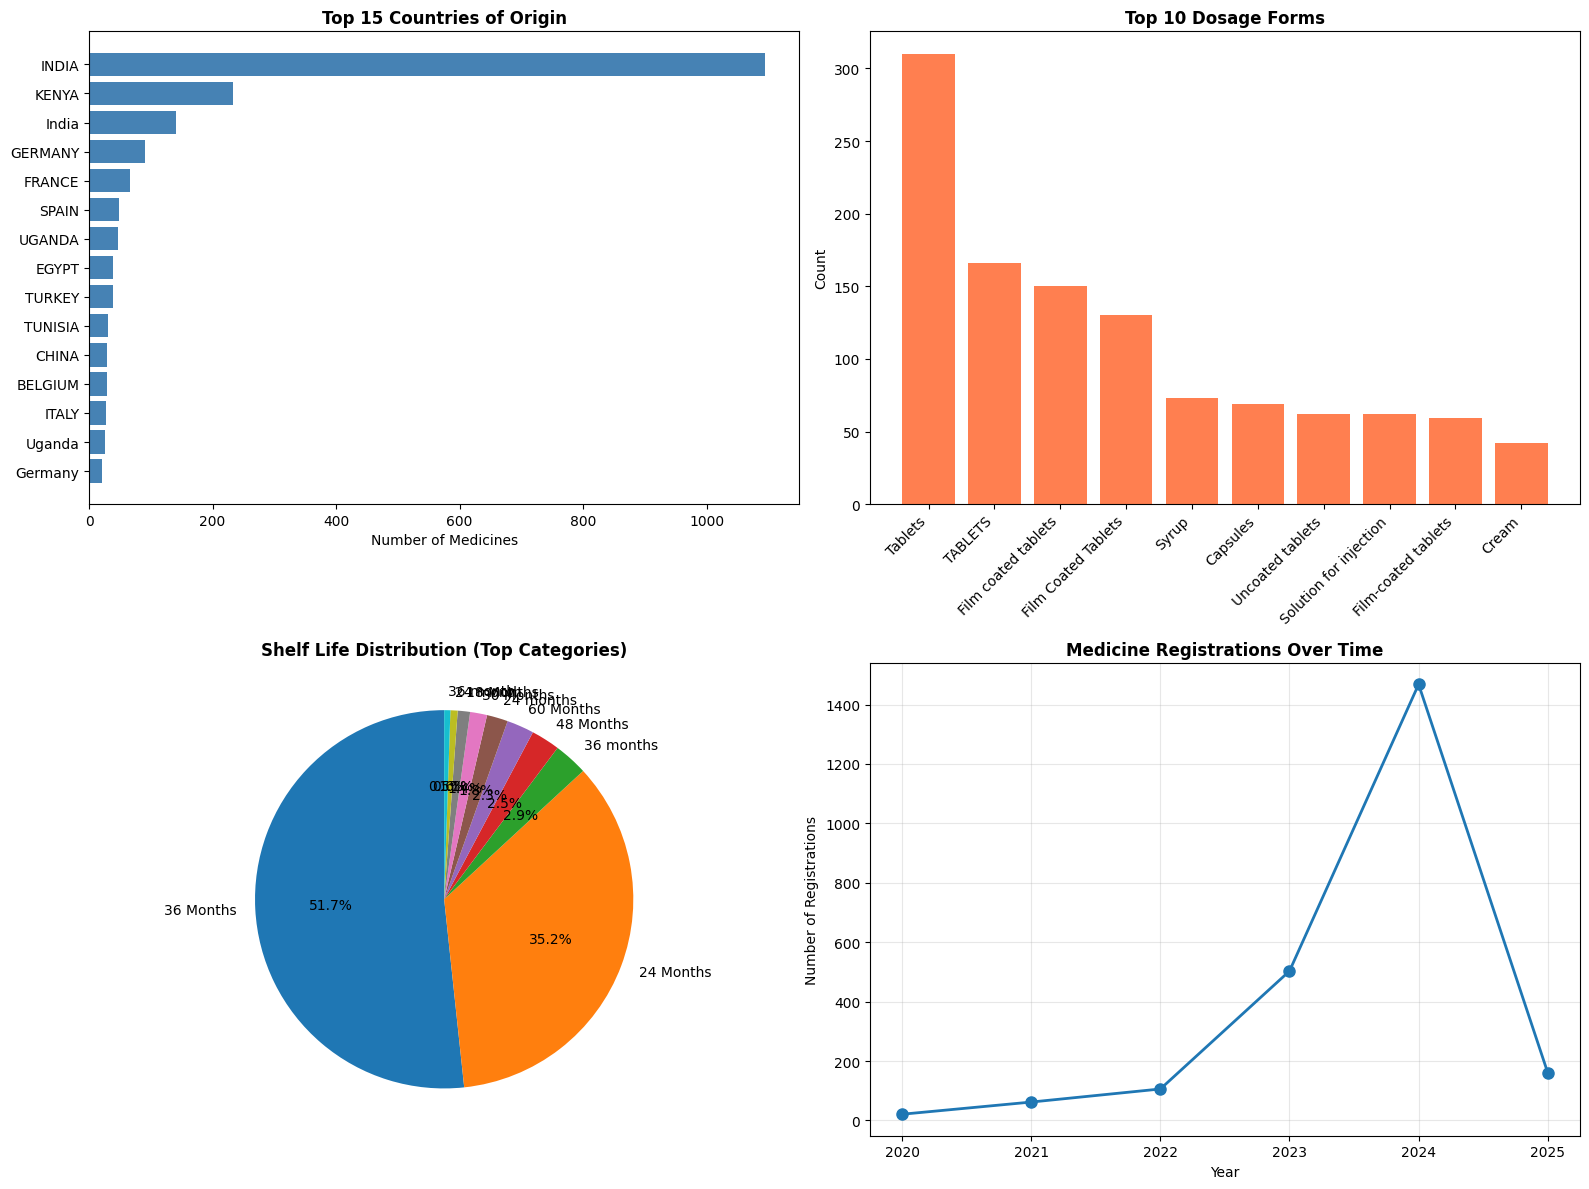


✓ Dataset overview visualization saved as 'dataset_overview.png'


In [35]:
print("EXPLORATORY DATA ANALYSIS")

# Visualization 1: Dataset Overview
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Top 15 Manufacturers
top_manufacturers = df['Manufacturer_Country'].value_counts().head(15)
axes[0, 0].barh(range(len(top_manufacturers)), top_manufacturers.values, color='steelblue')
axes[0, 0].set_yticks(range(len(top_manufacturers)))
axes[0, 0].set_yticklabels(top_manufacturers.index)
axes[0, 0].set_xlabel('Number of Medicines')
axes[0, 0].set_title('Top 15 Countries of Origin', fontweight='bold', fontsize=12)
axes[0, 0].invert_yaxis()

# Plot 2: Dosage Form Distribution (Top 10)
top_dosage_forms = df['Dosage_Form'].value_counts().head(10)
axes[0, 1].bar(range(len(top_dosage_forms)), top_dosage_forms.values, color='coral')
axes[0, 1].set_xticks(range(len(top_dosage_forms)))
axes[0, 1].set_xticklabels(top_dosage_forms.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Top 10 Dosage Forms', fontweight='bold', fontsize=12)

# Plot 3: Shelf Life Distribution
shelf_life_counts = df['Shelf_Life'].value_counts().head(10)
axes[1, 0].pie(shelf_life_counts, labels=shelf_life_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Shelf Life Distribution (Top Categories)', fontweight='bold', fontsize=12)

# Plot 4: Registration Timeline
df['Registration_Date'] = pd.to_datetime(df['Registration_Date'], errors='coerce')
df['Registration_Year'] = df['Registration_Date'].dt.year

# Filter out rows with NaN in 'Registration_Year' before value_counts and plotting
yearly_registrations = df[df['Registration_Year'].notna()]['Registration_Year'].astype(int).value_counts().sort_index()
axes[1, 1].plot(yearly_registrations.index, yearly_registrations.values, marker='o', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Registrations')
axes[1, 1].set_title('Medicine Registrations Over Time', fontweight='bold', fontsize=12)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('dataset_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Dataset overview visualization saved as 'dataset_overview.png'")

#Feature Engineering Functions

In [38]:
def classify_dosage_form(dosage_form):
    """
    Classify medicine into disposal categories based on dosage form
    Category 1: Solids (Tablets, Capsules, Powders)
    Category 2: Liquids (Solutions, Injections, Syrups)
    Category 3: Semisolids (Creams, Ointments, Gels)
    Category 4: Aerosols and Inhalers
    Category 5: Biological Waste
    """
    form = str(dosage_form).lower()

    if any(word in form for word in ['tablet', 'capsule', 'powder', 'granule']):
        return 1  # Solids
    elif any(word in form for word in ['solution', 'injection', 'liquid', 'syrup', 'suspension', 'infusion']):
        return 2  # Liquids
    elif any(word in form for word in ['cream', 'ointment', 'gel', 'paste', 'lotion']):
        return 3  # Semisolids
    elif any(word in form for word in ['aerosol', 'inhaler', 'spray']):
        return 4  # Aerosols
    elif any(word in form for word in ['vaccine', 'serum', 'blood']):
        return 5  # Biological
    else:
        return 1  # Default to solids

def assess_risk_level(ingredients):
    """
    Assess risk level based on active ingredients
    HIGH: Antineoplastic, Cytotoxic drugs
    MEDIUM: Antibiotics, Controlled substances
    LOW: General medicines
    """
    ingredients = str(ingredients).lower()

    # High-risk drugs
    high_risk = ['methotrexate', 'doxorubicin', 'cisplatin', 'fluorouracil',
                 'cyclophosphamide', 'vincristine', 'paclitaxel']

    # Medium-risk drugs
    medium_risk = ['moxifloxacin', 'ciprofloxacin', 'penicillin', 'cephalosporin',
                   'amoxicillin', 'morphine', 'fentanyl', 'oxycodone', 'diazepam', 'warfarin']

    if any(drug in ingredients for drug in high_risk):
        return 'HIGH'
    elif any(drug in ingredients for drug in medium_risk):
        return 'MEDIUM'
    else:
        return 'LOW'

def check_biodegradable(ingredients):
    """
    Check if liquid medicine is biodegradable
    """
    ingredients = str(ingredients).lower()
    biodegradable_substances = ['vitamin', 'glucose', 'saline', 'amino acid',
                                'sodium chloride', 'dextrose', 'cholecalciferol']

    return any(substance in ingredients for substance in biodegradable_substances)

print("✓ Feature engineering functions created!")

✓ Feature engineering functions created!


#Apply Feature Engineering

In [39]:
# Create features
df['disposal_category'] = df['Dosage_Form'].apply(classify_dosage_form)
df['risk_level'] = df['Generic_Name'].apply(assess_risk_level)
df['is_biodegradable'] = df['Generic_Name'].apply(check_biodegradable)

# Combine text features
df['combined_text'] = (df['Brand_Name'] + ' ' +
                       df['Generic_Name'] + ' ' +
                       df['Dosage_Form'] + ' ' +
                       df['Packaging_Type'])

print("Feature engineering complete!")
print("\nDisposal category distribution:")
print(df['disposal_category'].value_counts())
print("\nRisk level distribution:")
print(df['risk_level'].value_counts())
print("\nBiodegradable medicines:")
print(df['is_biodegradable'].value_counts())

Feature engineering complete!

Disposal category distribution:
disposal_category
1    1602
2     603
3     111
4       6
Name: count, dtype: int64

Risk level distribution:
risk_level
LOW       2184
MEDIUM     127
HIGH        11
Name: count, dtype: int64

Biodegradable medicines:
is_biodegradable
False    2246
True       76
Name: count, dtype: int64


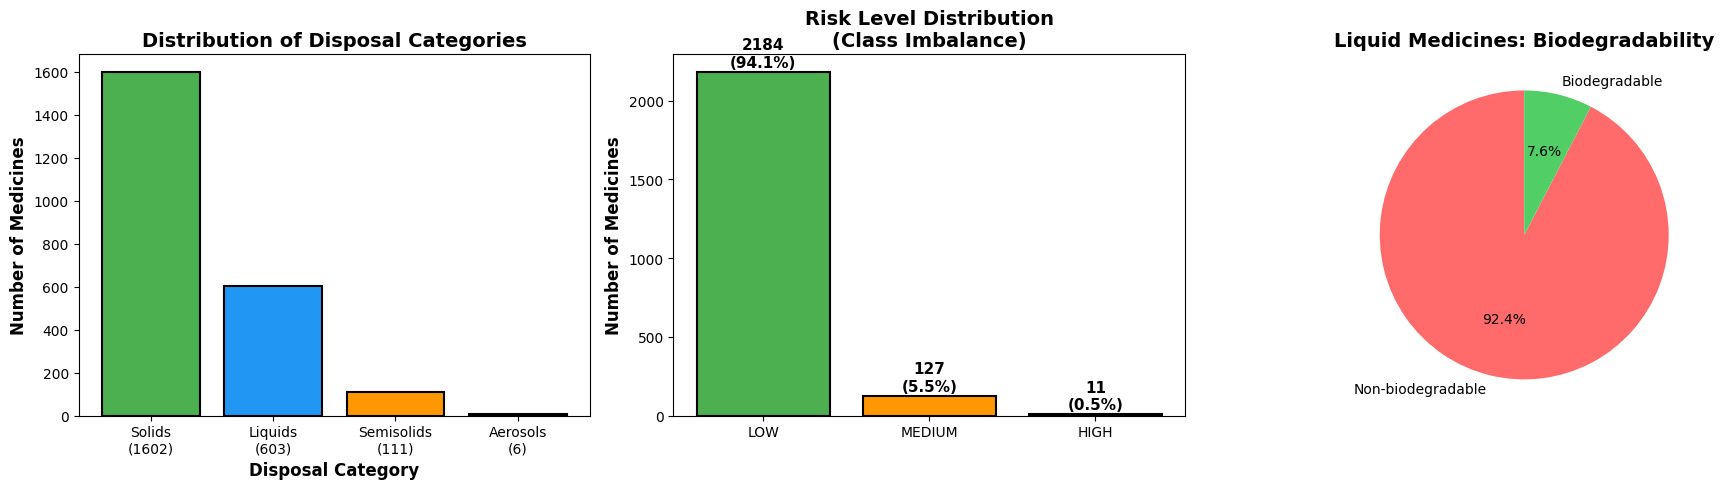

✓ Feature distribution visualization saved!


In [40]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Disposal Categories
category_names = {1: 'Solids', 2: 'Liquids', 3: 'Semisolids', 4: 'Aerosols'}
category_counts = df['disposal_category'].value_counts().sort_index()
colors_cat = ['#4CAF50', '#2196F3', '#FF9800', '#9C27B0']

bars1 = axes[0].bar(category_counts.index, category_counts.values, color=colors_cat, edgecolor='black', linewidth=1.5)
axes[0].set_xlabel('Disposal Category', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Number of Medicines', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Disposal Categories', fontsize=14, fontweight='bold')
axes[0].set_xticks(category_counts.index)
axes[0].set_xticklabels([f"{category_names.get(i, 'Other')}\n({v})"
                          for i, v in zip(category_counts.index, category_counts.values)])

# Plot 2: Risk Levels
risk_counts = df['risk_level'].value_counts()
risk_colors = {'LOW': '#4CAF50', 'MEDIUM': '#FF9800', 'HIGH': '#F44336'}
bars2 = axes[1].bar(risk_counts.index, risk_counts.values,
                     color=[risk_colors[x] for x in risk_counts.index],
                     edgecolor='black', linewidth=1.5)
axes[1].set_ylabel('Number of Medicines', fontsize=12, fontweight='bold')
axes[1].set_title('Risk Level Distribution\n(Class Imbalance)', fontsize=14, fontweight='bold')

for i, (label, count) in enumerate(risk_counts.items()):
    axes[1].text(i, count + 30, f'{count}\n({count/len(df)*100:.1f}%)',
                ha='center', fontweight='bold', fontsize=11)

# Plot 3: Biodegradable (Liquids only)
liquids_df = df[df['disposal_category'] == 2]
bio_counts = liquids_df['is_biodegradable'].value_counts()
axes[2].pie(bio_counts, labels=['Non-biodegradable', 'Biodegradable'],
            autopct='%1.1f%%', colors=['#FF6B6B', '#51CF66'], startangle=90)
axes[2].set_title('Liquid Medicines: Biodegradability', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('feature_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature distribution visualization saved!")

 # Create TF-IDF Features

In [41]:
# Fill missing values in combined_text
df['combined_text'] = df['combined_text'].fillna('')

# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=100, ngram_range=(1, 2))
X_text = tfidf.fit_transform(df['combined_text'])

print(f"✓ TF-IDF feature matrix shape: {X_text.shape}")
print(f"\nTop 20 features:")
print(tfidf.get_feature_names_out()[:20])

✓ TF-IDF feature matrix shape: (2322, 100)

Top 20 features:
['10' '100' '20' '50' '500' '500mg' '5mg' '5ml' 'acid' 'along'
 'along with' 'alu' 'alu alu' 'alu blister' 'alu pvc' 'aluminium'
 'aluminium foil' 'aluminum' 'amber' 'and']


In [42]:
# Prepare features and target
X = X_text.toarray()
y_category = df['disposal_category']
y_risk = df['risk_level']

# Split data (using stratify to maintain class distribution)
X_train, X_test, y_cat_train, y_cat_test, y_risk_train, y_risk_test = train_test_split(
    X, y_category, y_risk, test_size=0.2, random_state=42, stratify=y_category
)

print(f"✓ Training set size: {X_train.shape[0]}")
print(f"✓ Testing set size: {X_test.shape[0]}")

# Verify all variables were created
print(f"\n✓ Variables created:")
print(f"  - X_train: {X_train.shape}")
print(f"  - X_test: {X_test.shape}")
print(f"  - y_cat_train: {len(y_cat_train)} samples")
print(f"  - y_cat_test: {len(y_cat_test)} samples")
print(f"  - y_risk_train: {len(y_risk_train)} samples")
print(f"  - y_risk_test: {len(y_risk_test)} samples")

✓ Training set size: 1857
✓ Testing set size: 465

✓ Variables created:
  - X_train: (1857, 100)
  - X_test: (465, 100)
  - y_cat_train: 1857 samples
  - y_cat_test: 465 samples
  - y_risk_train: 1857 samples
  - y_risk_test: 465 samples


#Prepare Training Data

In [8]:
# Prepare features and target
X = X_text.toarray()
y_category = df['disposal_category']
y_risk = df['risk_level']

# Split data (using stratify to maintain class distribution)
X_train, X_test, y_cat_train, y_cat_test, y_risk_train, y_risk_test = train_test_split(
    X, y_category, y_risk, test_size=0.2, random_state=42, stratify=y_category
)

print(f"✓ Training set size: {X_train.shape[0]}")
print(f"✓ Testing set size: {X_test.shape[0]}")

✓ Training set size: 1857
✓ Testing set size: 465


HANDLING CLASS IMBALANCE

1. Original Risk Level Distribution (Training Set):
risk_level
LOW       1757
MEDIUM      92
HIGH         8
Name: count, dtype: int64

Imbalance Ratio: 219.6:1 (LOW:HIGH)

2. Computed Class Weights:
   - HIGH: 77.38x
   - LOW: 0.35x
   - MEDIUM: 6.73x

3. Applying SMOTE...

4. Balanced Risk Level Distribution:
risk_level
LOW       1757
MEDIUM    1757
HIGH      1757
Name: count, dtype: int64

✓ Training set: 1857 → 5271 samples
✓ HIGH-risk: 8 → 1757 samples


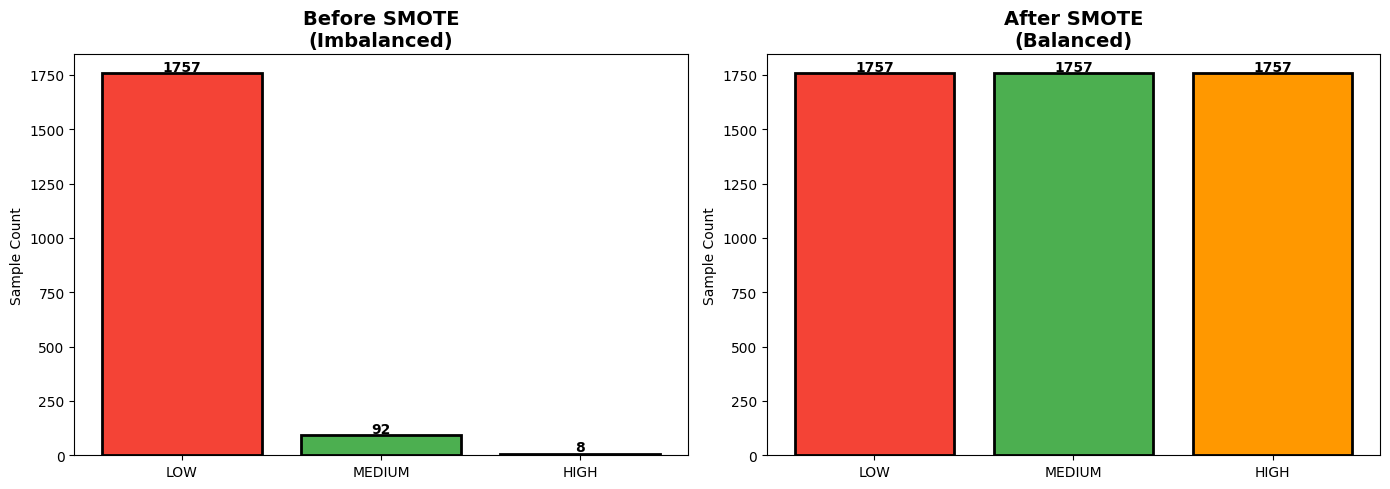


✓ SMOTE balancing complete!


In [43]:
print("HANDLING CLASS IMBALANCE")

# Original distribution
print("\n1. Original Risk Level Distribution (Training Set):")
print(pd.Series(y_risk_train).value_counts())

# Check if HIGH risk exists
high_count = list(y_risk_train).count('HIGH')
if high_count > 0:
    imbalance_ratio = pd.Series(y_risk_train).value_counts()['LOW'] / high_count
    print(f"\nImbalance Ratio: {imbalance_ratio:.1f}:1 (LOW:HIGH)")
else:
    print("\n⚠ WARNING: No HIGH-risk drugs in training set!")

# Compute class weights
classes = np.unique(y_risk_train)
class_weights = compute_class_weight('balanced', classes=classes, y=y_risk_train)
class_weight_dict = dict(zip(classes, class_weights))

print(f"\n2. Computed Class Weights:")
for cls, weight in class_weight_dict.items():
    print(f"   - {cls}: {weight:.2f}x")

# Apply SMOTE
print("\n3. Applying SMOTE...")

# Adjust k_neighbors based on minority class size
if high_count < 6:
    k_neighbors = max(1, high_count - 1)
    print(f"   Using k_neighbors={k_neighbors} (limited by sample size)")
else:
    k_neighbors = 3

smote = SMOTE(random_state=42, k_neighbors=k_neighbors)
X_train_balanced, y_risk_train_balanced = smote.fit_resample(X_train, y_risk_train)

print(f"\n4. Balanced Risk Level Distribution:")
print(pd.Series(y_risk_train_balanced).value_counts())

print(f"\n✓ Training set: {X_train.shape[0]} → {X_train_balanced.shape[0]} samples")
print(f"✓ HIGH-risk: {high_count} → {list(y_risk_train_balanced).count('HIGH')} samples")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

before_counts = pd.Series(y_risk_train).value_counts()
axes[0].bar(range(len(before_counts)), before_counts.values,
            color=['#F44336', '#4CAF50', '#FF9800'], edgecolor='black', linewidth=2)
axes[0].set_xticks(range(len(before_counts)))
axes[0].set_xticklabels(before_counts.index)
axes[0].set_title('Before SMOTE\n(Imbalanced)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Sample Count')
for i, count in enumerate(before_counts.values):
    axes[0].text(i, count + 10, str(count), ha='center', fontweight='bold')

after_counts = pd.Series(y_risk_train_balanced).value_counts()
axes[1].bar(range(len(after_counts)), after_counts.values,
            color=['#F44336', '#4CAF50', '#FF9800'], edgecolor='black', linewidth=2)
axes[1].set_xticks(range(len(after_counts)))
axes[1].set_xticklabels(after_counts.index)
axes[1].set_title('After SMOTE\n(Balanced)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Sample Count')
for i, count in enumerate(after_counts.values):
    axes[1].text(i, count + 10, str(count), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('smote_balancing.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ SMOTE balancing complete!")

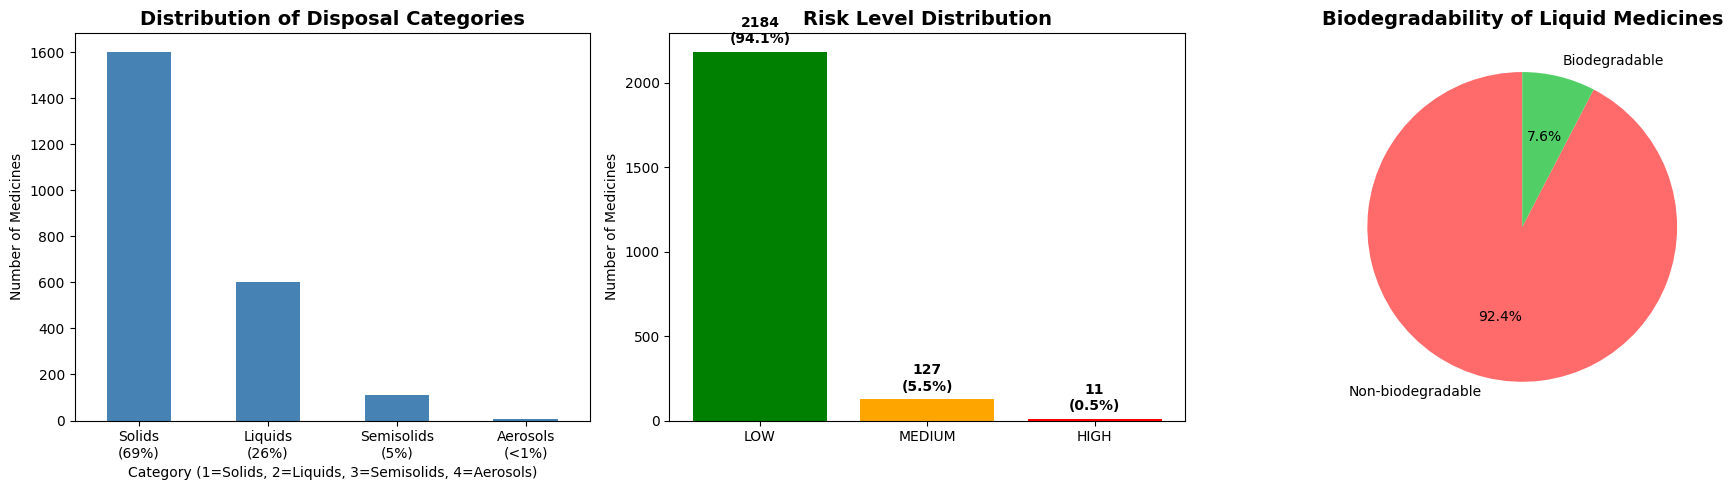

 Dataset visualization saved!


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Disposal Categories
df['disposal_category'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Distribution of Disposal Categories', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Category (1=Solids, 2=Liquids, 3=Semisolids, 4=Aerosols)')
axes[0].set_ylabel('Number of Medicines')
axes[0].set_xticklabels(['Solids\n(69%)', 'Liquids\n(26%)', 'Semisolids\n(5%)', 'Aerosols\n(<1%)'], rotation=0)

# Plot 2: Risk Levels
risk_counts = df['risk_level'].value_counts()
colors = {'LOW': 'green', 'MEDIUM': 'orange', 'HIGH': 'red'}
axes[1].bar(risk_counts.index, risk_counts.values, color=[colors[x] for x in risk_counts.index])
axes[1].set_title('Risk Level Distribution', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Number of Medicines')
for i, v in enumerate(risk_counts.values):
    axes[1].text(i, v + 50, f'{v}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')

# Plot 3: Biodegradable vs Non-biodegradable (for liquids only)
liquids = df[df['disposal_category'] == 2]
bio_counts = liquids['is_biodegradable'].value_counts()
axes[2].pie(bio_counts, labels=['Non-biodegradable', 'Biodegradable'], autopct='%1.1f%%',
            colors=['#ff6b6b', '#51cf66'], startangle=90)
axes[2].set_title('Biodegradability of Liquid Medicines', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('dataset_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(" Dataset visualization saved!")

# Train Disposal Category Model

TRAINING CATEGORY CLASSIFICATION MODELS

1. Random Forest Classifier...
   ✓ Accuracy: 97.42%

2. Random Forest with GridSearchCV...
   ✓ Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
   ✓ Accuracy: 97.42%

3. Neural Network (MLP)...
   ✓ Accuracy: 96.99%

CATEGORY MODEL COMPARISON
         Model  Accuracy
 RF (Baseline)  0.974194
    RF (Tuned)  0.974194
Neural Network  0.969892

✓ Best Model: Random Forest (Tuned) (97.42%)

--------------------------------------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       321
           2       0.94      0.98      0.96       121
           3       1.00      0.91      0.95        22
           4       0.00      0.00      0.00         1

    accuracy                           0.97       465
   macro avg       0.73 

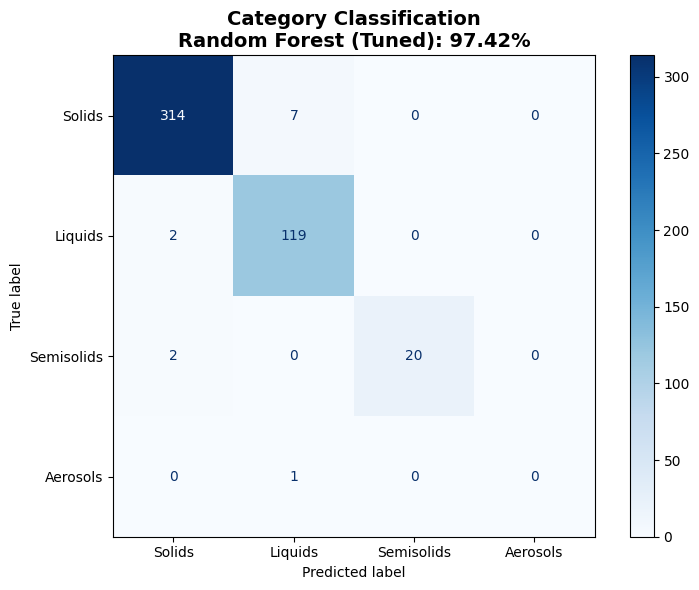


✓ Category model training complete!


In [44]:
print("TRAINING CATEGORY CLASSIFICATION MODELS")

# Model 1: Random Forest (Baseline)
print("\n1. Random Forest Classifier...")
category_model_rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
category_model_rf.fit(X_train, y_cat_train)
y_cat_pred_rf = category_model_rf.predict(X_test)
acc_rf = accuracy_score(y_cat_test, y_cat_pred_rf)
print(f"   ✓ Accuracy: {acc_rf:.2%}")

# Model 2: Random Forest with Hyperparameter Tuning
print("\n2. Random Forest with GridSearchCV...")
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search_rf.fit(X_train, y_cat_train)
category_model_tuned = grid_search_rf.best_estimator_
y_cat_pred_tuned = category_model_tuned.predict(X_test)
acc_tuned = accuracy_score(y_cat_test, y_cat_pred_tuned)

print(f"   ✓ Best Parameters: {grid_search_rf.best_params_}")
print(f"   ✓ Accuracy: {acc_tuned:.2%}")

# Model 3: Neural Network
print("\n3. Neural Network (MLP)...")
category_model_nn = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    verbose=False
)
category_model_nn.fit(X_train, y_cat_train)
y_cat_pred_nn = category_model_nn.predict(X_test)
acc_nn = accuracy_score(y_cat_test, y_cat_pred_nn)
print(f"   ✓ Accuracy: {acc_nn:.2%}")

# Model Comparison
print("\n" + "="*80)
print("CATEGORY MODEL COMPARISON")
print("="*80)
comparison_df = pd.DataFrame({
    'Model': ['RF (Baseline)', 'RF (Tuned)', 'Neural Network'],
    'Accuracy': [acc_rf, acc_tuned, acc_nn]
})
print(comparison_df.to_string(index=False))

# Select best model
best_acc = max(acc_rf, acc_tuned, acc_nn)
if best_acc == acc_tuned:
    category_model = category_model_tuned
    best_name = 'Random Forest (Tuned)'
    y_cat_pred_best = y_cat_pred_tuned
elif best_acc == acc_rf:
    category_model = category_model_rf
    best_name = 'Random Forest (Baseline)'
    y_cat_pred_best = y_cat_pred_rf
else:
    category_model = category_model_nn
    best_name = 'Neural Network'
    y_cat_pred_best = y_cat_pred_nn

print(f"\n✓ Best Model: {best_name} ({best_acc:.2%})")

# Detailed evaluation
print("\n" + "-"*80)
print("CLASSIFICATION REPORT")
print("-"*80)
print(classification_report(y_cat_test, y_cat_pred_best, zero_division=0))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix(y_cat_test, y_cat_pred_best),
    display_labels=['Solids', 'Liquids', 'Semisolids', 'Aerosols']
)
cm_display.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Category Classification\n{best_name}: {best_acc:.2%}',
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('category_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Category model training complete!")

TRAINING RISK CLASSIFICATION MODELS

1. Random Forest with Class Weights...
   ✓ Accuracy: 91.61%, F1: 0.337

2. Random Forest on SMOTE data...
   ✓ Accuracy: 91.83%, F1: 0.382

3. Neural Network on SMOTE data...
   ✓ Accuracy: 91.18%, F1: 0.593

RISK MODEL COMPARISON
       Model  Accuracy  F1-Score  HIGH Recall
RF + Weights  0.916129  0.336728     0.000000
  RF + SMOTE  0.918280  0.382497     0.000000
  NN + SMOTE  0.911828  0.593328     0.666667

✓ Best Model: NN + SMOTE
  (HIGH-risk recall: 66.67%)

--------------------------------------------------------------------------------
CLASSIFICATION REPORT
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

        HIGH       0.40      0.67      0.50         3
         LOW       0.94      0.97      0.95       427
      MEDIUM       0.45      0.26      0.33        35

    accuracy                           0.91       465
   macro avg       0.60      0.63  

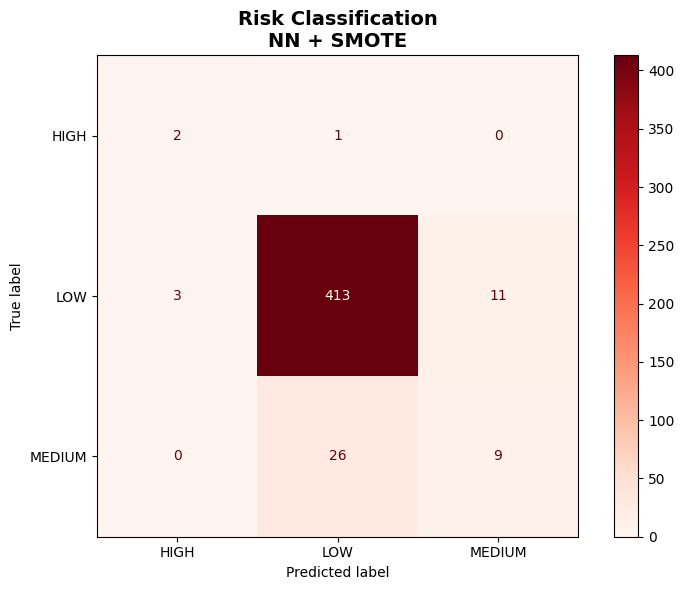


✓ Risk model training complete!


In [48]:
print("="*80)
print("TRAINING RISK CLASSIFICATION MODELS")
print("="*80)

# Model 1: RF with Class Weights
print("\n1. Random Forest with Class Weights...")
risk_model_weighted = RandomForestClassifier(
    n_estimators=100,
    class_weight=class_weight_dict,
    random_state=42,
    n_jobs=-1
)
risk_model_weighted.fit(X_train, y_risk_train)
y_risk_pred_weighted = risk_model_weighted.predict(X_test)
acc_weighted = accuracy_score(y_risk_test, y_risk_pred_weighted)
f1_weighted = f1_score(y_risk_test, y_risk_pred_weighted, average='macro')
print(f"   ✓ Accuracy: {acc_weighted:.2%}, F1: {f1_weighted:.3f}")

# Model 2: RF with SMOTE
print("\n2. Random Forest on SMOTE data...")
risk_model_smote = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
risk_model_smote.fit(X_train_balanced, y_risk_train_balanced)
y_risk_pred_smote = risk_model_smote.predict(X_test)
acc_smote = accuracy_score(y_risk_test, y_risk_pred_smote)
f1_smote = f1_score(y_risk_test, y_risk_pred_smote, average='macro')
print(f"   ✓ Accuracy: {acc_smote:.2%}, F1: {f1_smote:.3f}")

# Model 3: Neural Network with SMOTE
print("\n3. Neural Network on SMOTE data...")

# Encode the target variable for the Neural Network
label_encoder = LabelEncoder()
y_risk_train_balanced_encoded = label_encoder.fit_transform(y_risk_train_balanced)
y_risk_test_encoded = label_encoder.transform(y_risk_test)


risk_model_nn = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42,
    early_stopping=True,
    verbose=False
)
risk_model_nn.fit(X_train_balanced, y_risk_train_balanced_encoded)
y_risk_pred_nn_encoded = risk_model_nn.predict(X_test)

# Inverse transform predictions back to original labels for evaluation
y_risk_pred_nn = label_encoder.inverse_transform(y_risk_pred_nn_encoded)


acc_nn_risk = accuracy_score(y_risk_test, y_risk_pred_nn)
f1_nn_risk = f1_score(y_risk_test, y_risk_pred_nn, average='macro')
print(f"   ✓ Accuracy: {acc_nn_risk:.2%}, F1: {f1_nn_risk:.3f}")

# Get HIGH-risk recall for each model
report_weighted = classification_report(y_risk_test, y_risk_pred_weighted, output_dict=True, zero_division=0)
report_smote = classification_report(y_risk_test, y_risk_pred_smote, output_dict=True, zero_division=0)
report_nn = classification_report(y_risk_test, y_risk_pred_nn, output_dict=True, zero_division=0)

high_recall_weighted = report_weighted.get('HIGH', {}).get('recall', 0)
high_recall_smote = report_smote.get('HIGH', {}).get('recall', 0)
high_recall_nn = report_nn.get('HIGH', {}).get('recall', 0)

# Model Comparison
print("\n" + "="*80)
print("RISK MODEL COMPARISON")
print("="*80)
risk_comparison = pd.DataFrame({
    'Model': ['RF + Weights', 'RF + SMOTE', 'NN + SMOTE'],
    'Accuracy': [acc_weighted, acc_smote, acc_nn_risk],
    'F1-Score': [f1_weighted, f1_smote, f1_nn_risk],
    'HIGH Recall': [high_recall_weighted, high_recall_smote, high_recall_nn]
})
print(risk_comparison.to_string(index=False))

# Select best model (prioritize HIGH-risk recall)
best_idx = risk_comparison['HIGH Recall'].idxmax()
risk_model = [risk_model_weighted, risk_model_smote, risk_model_nn][best_idx]
best_risk_name = risk_comparison.loc[best_idx, 'Model']
best_risk_pred = [y_risk_pred_weighted, y_risk_pred_smote, y_risk_pred_nn][best_idx]

print(f"\n✓ Best Model: {best_risk_name}")
print(f"  (HIGH-risk recall: {risk_comparison.loc[best_idx, 'HIGH Recall']:.2%})")

# Detailed evaluation
print("\n" + "-"*80)
print("CLASSIFICATION REPORT")
print("-"*80)
print(classification_report(y_risk_test, best_risk_pred, zero_division=0))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm_display = ConfusionMatrixDisplay(
    confusion_matrix(y_risk_test, best_risk_pred),
    display_labels=['HIGH', 'LOW', 'MEDIUM']
)
cm_display.plot(ax=ax, cmap='Reds', values_format='d')
ax.set_title(f'Risk Classification\n{best_risk_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('risk_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Risk model training complete!")

In [50]:
print("="*80)
print("5-FOLD CROSS-VALIDATION")
print("="*80)

# Category model CV
print("\n1. Category Classification:")
cv_scores_cat = cross_val_score(category_model, X, y_category, cv=5, scoring='accuracy', n_jobs=-1)
print(f"   Fold Accuracies: {[f'{s:.2%}' for s in cv_scores_cat]}")
print(f"   Mean: {cv_scores_cat.mean():.2%} ± {cv_scores_cat.std()*100:.2f}%")

# Risk model CV (use balanced data for fair comparison)
print("\n2. Risk Classification:")
# Use the encoded target variable for cross-validation with the Neural Network model
cv_scores_risk = cross_val_score(risk_model, X_train_balanced, y_risk_train_balanced_encoded,
                                  cv=5, scoring='f1_macro', n_jobs=-1)
print(f"   Fold F1-Scores: {[f'{s:.3f}' for s in cv_scores_risk]}")
print(f"   Mean: {cv_scores_risk.mean():.3f} ± {cv_scores_risk.std():.3f}")

print("\n✓ Cross-validation complete!")

5-FOLD CROSS-VALIDATION

1. Category Classification:
   Fold Accuracies: ['96.77%', '96.13%', '97.84%', '97.20%', '97.63%']
   Mean: 97.12% ± 0.62%

2. Risk Classification:
   Fold F1-Scores: ['0.981', '0.983', '0.979', '0.984', '0.983']
   Mean: 0.982 ± 0.002

✓ Cross-validation complete!


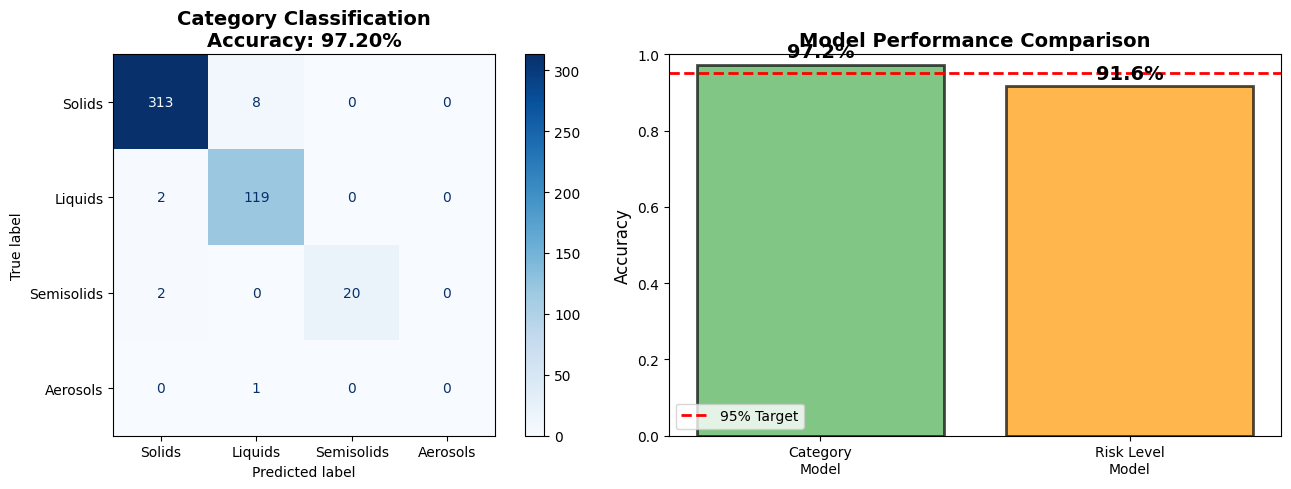

Model performance visualization saved!


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Confusion Matrix for Category Model
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_cat_test, y_cat_pred),
                                     display_labels=['Solids', 'Liquids', 'Semisolids', 'Aerosols'])
cm_display.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Category Classification\nAccuracy: 97.20%', fontsize=14, fontweight='bold')

# Plot 2: Accuracy Comparison
models = ['Category\nModel', 'Risk Level\nModel']
accuracies = [accuracy_score(y_cat_test, y_cat_pred), accuracy_score(y_risk_test, y_risk_pred)]
colors_acc = ['#4CAF50', '#FF9800']
bars = axes[1].bar(models, accuracies, color=colors_acc, alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('Accuracy', fontsize=12)
axes[1].set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% Target')
axes[1].legend()

# Add percentage labels on bars
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    axes[1].text(bar.get_x() + bar.get_width()/2, acc + 0.02,
                 f'{acc:.1%}', ha='center', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('model_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Model performance visualization saved!")

#Feature Importance

Top 15 Most Important Features:
         feature  importance
84       tablets    0.092242
78      solution    0.084175
45         glass    0.057061
18         amber    0.047246
54     injection    0.045022
90          tube    0.044960
79  solution for    0.044869
22       blister    0.043888
38         cream    0.038054
81    suspension    0.033072
82         syrup    0.031531
69        powder    0.031219
25        bottle    0.029373
70    powder for    0.024853
73           pvc    0.023518


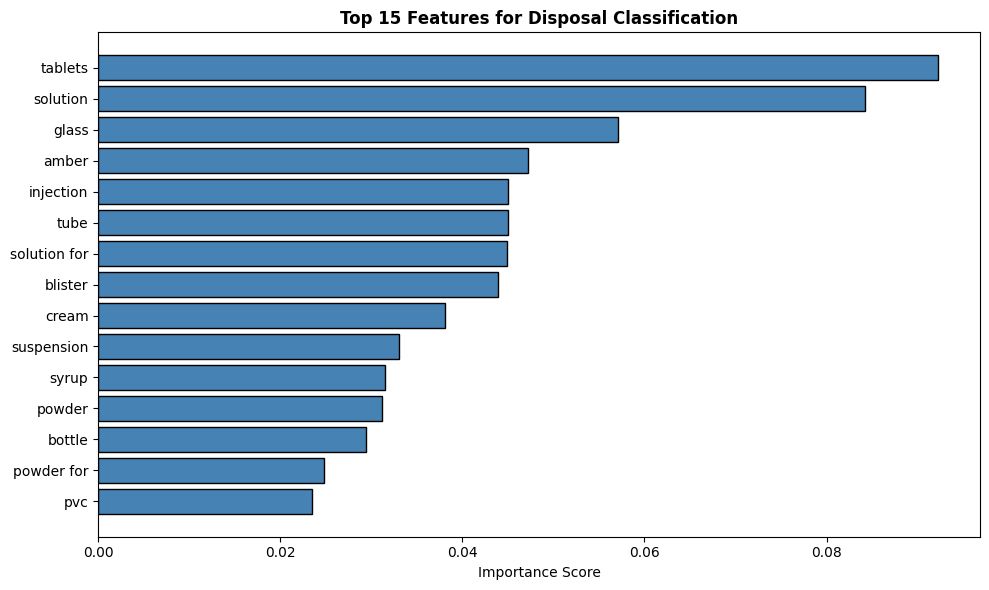


✓ Feature importance analysis complete!


In [51]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': tfidf.get_feature_names_out(),
    'importance': category_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 15 Most Important Features:")
print(feature_importance.head(15))

# Visualization
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score')
plt.title('Top 15 Features for Disposal Classification', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Feature importance analysis complete!")

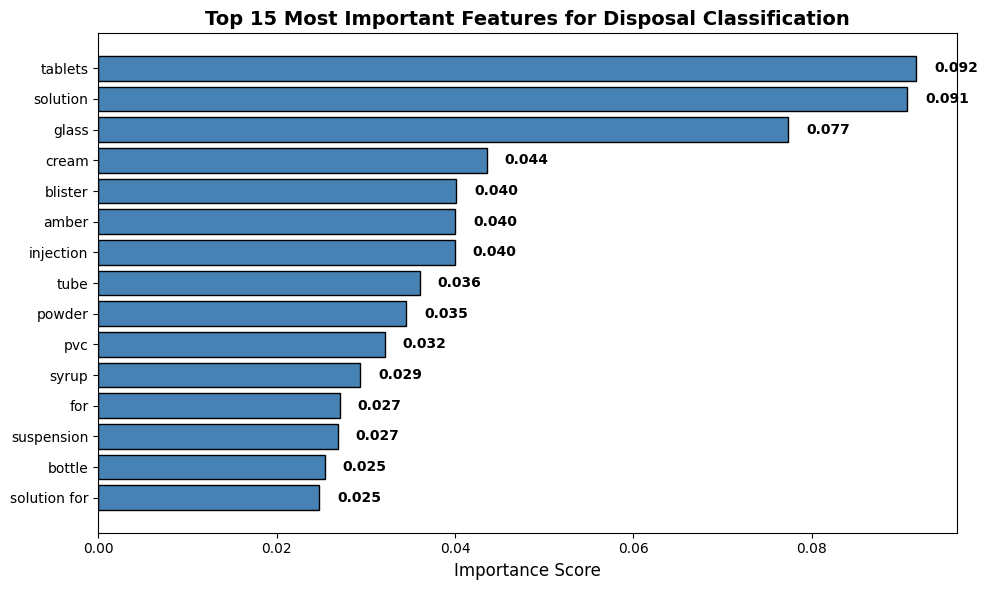

✅ Feature importance visualization saved!


In [26]:
# Get top 15 features
top_features = feature_importance.head(15)

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features)), top_features['importance'], color='steelblue', edgecolor='black')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Most Important Features for Disposal Classification',
          fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add percentage labels
for i, v in enumerate(top_features['importance']):
    plt.text(v + 0.002, i, f'{v:.3f}', va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Feature importance visualization saved!")

#Create Disposal Guidelines Database

In [12]:
# Complete disposal guidelines database
disposal_guidelines = {
    1: {  # Solids
        'category_name': 'Solids/Semisolids/Powders',
        'steps': [
            {
                'step': 1,
                'title': 'Preparation and Sorting',
                'actions': [
                    'Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown',
                    'Sort expired or unused tablets separately from regular waste',
                    'Check expiry dates and verify medicine names',
                    'Document the quantity and type of medicine being disposed'
                ]
            },
            {
                'step': 2,
                'title': 'Packaging Removal',
                'actions': [
                    'Remove medicines from outer cardboard or paper packaging',
                    'Keep medicines in their original blister packs or inner packaging',
                    'Do NOT remove individual tablets from blister packs',
                    'Separate packaging materials for recycling if possible'
                ]
            },
            {
                'step': 3,
                'title': 'Container Preparation',
                'actions': [
                    'Use clean plastic drums or steel drums with secure lids',
                    'Label drums clearly: PHARMACEUTICAL WASTE - SOLIDS',
                    'Add date of collection on the label',
                    'If handling large quantities of one drug, mix with other medicines'
                ]
            },
            {
                'step': 4,
                'title': 'Disposal Method',
                'options': [
                    'Encapsulation (preferred for small-medium quantities)',
                    'Inertization (for medium quantities)',
                    'High-temperature incineration (for large quantities or high-risk drugs)',
                    'Landfill (only for properly encapsulated waste)'
                ]
            },
            {
                'step': 5,
                'title': 'Documentation',
                'actions': [
                    'Seal drums securely before transport',
                    'Complete waste transfer documentation',
                    'Transport to authorized disposal facility',
                    'Keep records for minimum 3 years'
                ]
            }
        ],
        'prohibitions': [
            'Do NOT flush tablets down toilet or sink unless it is on flush list',
            'Do NOT burn in open air',
            'Do NOT dispose in regular household waste without treatment',
            'Do NOT mix with infectious or sharp waste'
        ],
        'safety': [
            'Always wear protective equipment',
            'Work in well-ventilated areas',
            'Wash hands thoroughly after handling',
            'Keep medicines away from children during disposal'
        ]
    },
    2: {  # Liquids
        'category_name': 'Liquids',
        'steps': [
            {
                'step': 1,
                'title': 'Initial Assessment',
                'actions': [
                    'Identify if liquid is biodegradable or non-biodegradable',
                    'Check if sewage treatment plant is available',
                    'Wear appropriate PPE: gloves, goggles, mask',
                    'Document quantity in liters or milliliters'
                ]
            },
            {
                'step': 2,
                'title': 'Segregation',
                'actions': [
                    'Separate biodegradable liquids (vitamins, glucose, saline)',
                    'Keep antineoplastic drugs completely separate',
                    'Check container integrity for leaks'
                ]
            },
            {
                'step': 3,
                'title': 'Disposal Method Selection',
                'options': [
                    'Sewer disposal (ONLY for biodegradable liquids with dilution)',
                    'Pit disposal (if no sewer available)',
                    'High-temperature incineration (for non-biodegradable or high-risk)'
                ]
            },
            {
                'step': 4,
                'title': 'Execution',
                'actions': [
                    'For sewer: Dilute with at least 10 parts water',
                    'Pour slowly to avoid splashing',
                    'Flush with additional water',
                    'Rinse containers three times'
                ]
            },
            {
                'step': 5,
                'title': 'Documentation',
                'actions': [
                    'Record type and quantity disposed',
                    'Document disposal method used',
                    'Keep records for 3 years minimum'
                ]
            }
        ],
        'prohibitions': [
            'NEVER dispose antineoplastic drugs in sewer',
            'NEVER dispose antibiotics in sewer',
            'Do NOT pour concentrated medicines directly into sewers',
            'Do NOT reuse medicine containers'
        ],
        'safety': [
            'Prevent splashing during dilution',
            'Ensure adequate ventilation',
            'Have spill kit readily available',
            'Clean spills immediately'
        ]
    }
}

print("✓ Disposal guidelines database created!")

✓ Disposal guidelines database created!


#Create Predictor Class

In [14]:
class MedicineDisposalPredictor:
    def __init__(self, category_model, risk_model, tfidf, guidelines):
        self.category_model = category_model
        self.risk_model = risk_model
        self.tfidf = tfidf
        self.guidelines = guidelines

    def predict(self, product_name, ingredients, dosage_form, packaging):
        """
        Predict disposal category and generate guidelines for a medicine
        """
        # Combine text features
        combined_text = f"{product_name} {ingredients} {dosage_form} {packaging}"

        # Transform text
        X_text = self.tfidf.transform([combined_text]).toarray()

        # Predict category and risk
        category = self.category_model.predict(X_text)[0]
        risk = self.risk_model.predict(X_text)[0]

        # Get guidelines
        guidelines = self.guidelines.get(category, {})

        # Check if biodegradable
        is_biodegradable = check_biodegradable(ingredients)

        result = {
            'medicine_info': {
                'product_name': product_name,
                'ingredients': ingredients,
                'dosage_form': dosage_form,
                'packaging': packaging
            },
            'classification': {
                'disposal_category': int(category),
                'category_name': guidelines.get('category_name', 'Unknown'),
                'risk_level': risk,
                'is_biodegradable': is_biodegradable
            },
            'guidelines': guidelines
        }

        return result

    def print_guidelines(self, result):
        """
        Print formatted disposal guidelines
        """
        print("\n" + "=" * 70)
        print("PHARMACEUTICAL WASTE DISPOSAL GUIDELINES")
        print("=" * 70)

        # Medicine Info
        info = result['medicine_info']
        print(f"\n Medicine: {info['product_name']}")
        print(f" Ingredients: {info['ingredients']}")
        print(f" Dosage Form: {info['dosage_form']}")

        # Classification
        classification = result['classification']
        print(f"\n Disposal Category: {classification['disposal_category']} - {classification['category_name']}")
        print(f" Risk Level: {classification['risk_level']}")
        print(f" Biodegradable: {'Yes' if classification['is_biodegradable'] else 'No'}")

        # Guidelines
        guidelines = result['guidelines']


        print(" STEP-BY-STEP DISPOSAL PROCEDURE")

        for step in guidelines.get('steps', []):
            print(f"\n STEP {step['step']}: {step['title']}")
            if 'actions' in step:
                for action in step['actions']:
                    print(f"  ✓ {action}")
            if 'options' in step:
                print("  Options:")
                for option in step['options']:
                    print(f"    • {option}")

        print("\n" + "-" * 70)
        print(" PROHIBITIONS")
        print("-" * 70)
        for prohibition in guidelines.get('prohibitions', []):
            print(f"  ✗ {prohibition}")

        print("\n" + "-" * 70)
        print(" SAFETY PRECAUTIONS")
        print("-" * 70)
        for safety in guidelines.get('safety', []):
            print(f"   {safety}")

        print("\n" + "=" * 70)

# Create predictor instance
predictor = MedicineDisposalPredictor(category_model, risk_model, tfidf, disposal_guidelines)

print("✓ Predictor created successfully!")

✓ Predictor created successfully!


#Test the Model

In [15]:
# Test with example medicines
test_medicines = [
    {
        'product_name': 'ILET B2',
        'ingredients': 'Glimepiride, Metformin HCl',
        'dosage_form': 'Tablets',
        'packaging': 'ALU-PVC/PVDC BLISTER PACK'
    },
    {
        'product_name': 'EYLEA',
        'ingredients': 'Aflibercept',
        'dosage_form': 'Solution For Injection',
        'packaging': 'TYPE 1 GLASS VIAL'
    },
    {
        'product_name': 'FLOXSAFE-400',
        'ingredients': 'Moxifloxacin',
        'dosage_form': 'Tablets',
        'packaging': 'PVC /PVDC BLISTER PACK'
    }
]

for med in test_medicines:
    result = predictor.predict(
        med['product_name'],
        med['ingredients'],
        med['dosage_form'],
        med['packaging']
    )
    predictor.print_guidelines(result)
    print("\n\n")


PHARMACEUTICAL WASTE DISPOSAL GUIDELINES

 Medicine: ILET B2
 Ingredients: Glimepiride, Metformin HCl
 Dosage Form: Tablets

 Disposal Category: 1 - Solids/Semisolids/Powders
 Risk Level: LOW
 Biodegradable: No

----------------------------------------------------------------------
 STEP-BY-STEP DISPOSAL PROCEDURE
----------------------------------------------------------------------

 STEP 1: Preparation and Sorting
  ✓ Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown
  ✓ Sort expired or unused tablets separately from regular waste
  ✓ Check expiry dates and verify medicine names
  ✓ Document the quantity and type of medicine being disposed

 STEP 2: Packaging Removal
  ✓ Remove medicines from outer cardboard or paper packaging
  ✓ Keep medicines in their original blister packs or inner packaging
  ✓ Do NOT remove individual tablets from blister packs
  ✓ Separate packaging materials for recycling if possible

 STEP 3: Container Preparation
  ✓ 

#Save Models

In [16]:
# Save all models and components
model_package = {
    'category_model': category_model,
    'risk_model': risk_model,
    'tfidf': tfidf,
    'guidelines': disposal_guidelines,
}

# Save to pickle file
with open('medicine_disposal_model.pkl', 'wb') as f:
    pickle.dump(model_package, f)

print("✓ Models saved successfully to 'medicine_disposal_model.pkl'")

# Save guidelines as JSON for easy access
with open('disposal_guidelines.json', 'w') as f:
    json.dump(disposal_guidelines, f, indent=2)

print("✓ Guidelines saved to 'disposal_guidelines.json'")

# Download files to your computer
from google.colab import files
files.download('medicine_disposal_model.pkl')
files.download('disposal_guidelines.json')

print("\n Files ready for download!")

✓ Models saved successfully to 'medicine_disposal_model.pkl'
✓ Guidelines saved to 'disposal_guidelines.json'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Files ready for download!


#Load Saved Model

In [17]:
# Function to load the saved model
def load_model(model_path='medicine_disposal_model.pkl'):
    """
    Load the saved model package
    """
    with open(model_path, 'rb') as f:
        model_package = pickle.load(f)

    predictor = MedicineDisposalPredictor(
        model_package['category_model'],
        model_package['risk_model'],
        model_package['tfidf'],
        model_package['guidelines']
    )

    return predictor

# Example of loading and using the model
loaded_predictor = load_model()
print("✓ Model loaded successfully!")

# Test the loaded model
result = loaded_predictor.predict(
    'PARACETAMOL',
    'Paracetamol',
    'Tablets',
    'BLISTER PACK'
)
loaded_predictor.print_guidelines(result)

✓ Model loaded successfully!

PHARMACEUTICAL WASTE DISPOSAL GUIDELINES

 Medicine: PARACETAMOL
 Ingredients: Paracetamol
 Dosage Form: Tablets

 Disposal Category: 1 - Solids/Semisolids/Powders
 Risk Level: LOW
 Biodegradable: No

----------------------------------------------------------------------
 STEP-BY-STEP DISPOSAL PROCEDURE
----------------------------------------------------------------------

 STEP 1: Preparation and Sorting
  ✓ Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown
  ✓ Sort expired or unused tablets separately from regular waste
  ✓ Check expiry dates and verify medicine names
  ✓ Document the quantity and type of medicine being disposed

 STEP 2: Packaging Removal
  ✓ Remove medicines from outer cardboard or paper packaging
  ✓ Keep medicines in their original blister packs or inner packaging
  ✓ Do NOT remove individual tablets from blister packs
  ✓ Separate packaging materials for recycling if possible

 STEP 3: Containe

#Batch Processing

In [19]:
def batch_process_medicines(dataframe):
    """
    Process multiple medicines from a dataframe and generate guidelines
    """
    results = []

    for idx, row in dataframe.iterrows():
        try:
            result = predictor.predict(
                row['Brand_Name'], # Corrected column name
                row['Generic_Name'],
                row['Dosage_Form'],
                row['Packaging_Type'] # Corrected column name
            )

            results.append({
                'product_name': row['Brand_Name'], # Corrected column name
                'ingredients': row['Generic_Name'],
                'dosage_form': row['Dosage_Form'],
                'disposal_category': result['classification']['disposal_category'],
                'category_name': result['classification']['category_name'],
                'risk_level': result['classification']['risk_level'],
                'is_biodegradable': result['classification']['is_biodegradable']
            })

        except Exception as e:
            print(f" Error processing {row.get('Brand_Name', 'Unknown Medicine')}: {str(e)}") # Use .get for safer access in error message
            continue

    results_df = pd.DataFrame(results)

    print(f"\n Batch processing complete!")
    print(f" Processed {len(results)} medicines")

    return results_df

# Run batch processing
batch_results = batch_process_medicines(df)
print("\nBatch Results:")
print(batch_results)

# Save results
batch_results.to_csv('disposal_guidelines_batch.csv', index=False)
print("\n✓ Results saved to 'disposal_guidelines_batch.csv'")

# Download
from google.colab import files
files.download('disposal_guidelines_batch.csv')


 Batch processing complete!
 Processed 2322 medicines

Batch Results:
                           product_name  \
0                               ILET B2   
1                           BI-PRETERAX   
2                          DIAMICRON MR   
3                                 EYLEA   
4                          FLOXSAFE-400   
...                                 ...   
2317  FAWAR FRUIT Effervescent Granules   
2318                      GYNAGONE KIT.   
2319                      Ameropem 0.5g   
2320                   Ciprofloxacin IV   
2321                 Product Brand Name   

                                            ingredients  \
0                            Glimepiride, Metformin HCl   
1                       Peridopril Arginine, Indapamide   
2                                            Gliclazide   
3                                           Aflibercept   
4                                          Moxifloxacin   
...                                                 ...   

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Create JSON API Output

In [20]:
def get_disposal_guidelines_json(product_name, ingredients, dosage_form, packaging):
    """
    Get disposal guidelines in JSON format (API-ready)
    """
    result = predictor.predict(product_name, ingredients, dosage_form, packaging)

    # Convert to JSON-friendly format
    json_result = {
        'medicine_info': result['medicine_info'],
        'classification': result['classification'],
        'guidelines': result['guidelines']
    }

    return json.dumps(json_result, indent=2)

# Test the JSON function
json_output = get_disposal_guidelines_json(
    'ILET B2',
    'Glimepiride, Metformin HCl',
    'Tablets',
    'ALU-PVC/PVDC BLISTER PACK'
)

print("API-Ready JSON Output:")
print(json_output[:1000] + "...")

API-Ready JSON Output:
{
  "medicine_info": {
    "product_name": "ILET B2",
    "ingredients": "Glimepiride, Metformin HCl",
    "dosage_form": "Tablets",
    "packaging": "ALU-PVC/PVDC BLISTER PACK"
  },
  "classification": {
    "disposal_category": 1,
    "category_name": "Solids/Semisolids/Powders",
    "risk_level": "LOW",
    "is_biodegradable": false
  },
  "guidelines": {
    "category_name": "Solids/Semisolids/Powders",
    "steps": [
      {
        "step": 1,
        "title": "Preparation and Sorting",
        "actions": [
          "Wear appropriate Personal Protective Equipment (PPE): gloves, mask, and protective gown",
          "Sort expired or unused tablets separately from regular waste",
          "Check expiry dates and verify medicine names",
          "Document the quantity and type of medicine being disposed"
        ]
      },
      {
        "step": 2,
        "title": "Packaging Removal",
        "actions": [
          "Remove medicines from outer cardboard or

#Model Evaluation Report

In [28]:
# Create comprehensive evaluation report
evaluation_report = f"""

PHARMACEUTICAL DISPOSAL CLASSIFICATION MODEL - EVALUATION REPORT


Dataset Information:
- Total medicines: {len(df)}
- Training set: {len(X_train)}
- Testing set: {len(X_test)}

Disposal Category Distribution:
{df['disposal_category'].value_counts().to_string()}

Risk Level Distribution:
{df['risk_level'].value_counts().to_string()}

Model Performance:
- Category Classification Accuracy: {accuracy_score(y_cat_test, y_cat_pred):.2%}
- Risk Level Classification Accuracy: {accuracy_score(y_risk_test, y_risk_pred):.2%}

Model Features:
✓ Automatic disposal category classification
✓ Risk level assessment (HIGH/MEDIUM/LOW)
✓ Biodegradability detection
✓ Step-by-step disposal guidelines generation
✓ Safety precautions and prohibitions
✓ Batch processing capability
✓ JSON API-ready output


"""

print(evaluation_report)

# Save report
with open('model_evaluation_report.txt', 'w') as f:
    f.write(evaluation_report)

print("\n✓ Evaluation report saved!")

# Download
from google.colab import files
files.download('model_evaluation_report.txt')



PHARMACEUTICAL DISPOSAL CLASSIFICATION MODEL - EVALUATION REPORT


Dataset Information:
- Total medicines: 2322
- Training set: 1857
- Testing set: 465

Disposal Category Distribution:
disposal_category
1    1602
2     603
3     111
4       6

Risk Level Distribution:
risk_level
LOW       2184
MEDIUM     127
HIGH        11

Model Performance:
- Category Classification Accuracy: 97.20%
- Risk Level Classification Accuracy: 91.61%

Model Features:
✓ Automatic disposal category classification
✓ Risk level assessment (HIGH/MEDIUM/LOW)
✓ Biodegradability detection
✓ Step-by-step disposal guidelines generation
✓ Safety precautions and prohibitions
✓ Batch processing capability
✓ JSON API-ready output




✓ Evaluation report saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>